### Bagging: Random Forest



Emezaremos aplicando el modelo a un problema de clasificación, en concreto a nuestro querido dataset del Titanic. Aprovecharemos también para ver la parte de importancia de características  (o feature importance). 

#### **Clasificación**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/titanic_modified.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   MissingAge  891 non-null    int64  
 7   Spouse      891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


Es un dataset preparado para este notebook, para no tener que limpiar ni transformar features (fijate que son todos ya datos numéricos), pero recuerda que no será así en la realidad. Vamos con el split.

In [2]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Survived'])
y = df.Survived

classes = X.columns.values.tolist() # Nos quedamos con las features para luego ver la importancia de cada una

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=55)

In [3]:
y.value_counts(normalize = True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

Sabemos que no está perfectamente balanceado o equilibrado, pero como es un ejercicio ilustrativo seguiremos adelante.

Antes de pasar a instanciar el modelo y entrenarlo un pequeño recordatorio gráfico de como funciona el algoritmo de bagging mediante Random Forest

## Random Forest

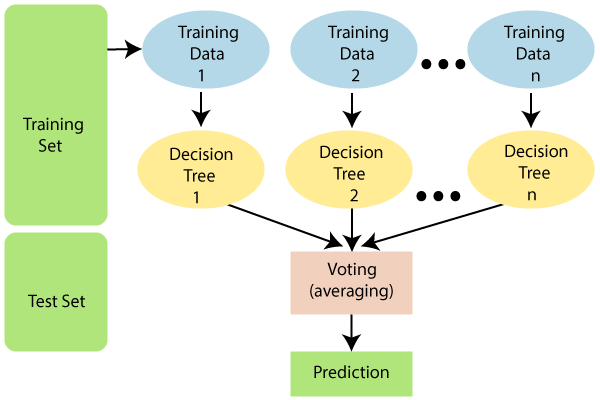

Demo: https://waternova.github.io/random-forest-viz/

Aquí un recuedo de los mecanismos de elección de la predicción: (recuerda que Random Forest en clasificación en sklearn usa soft voting)

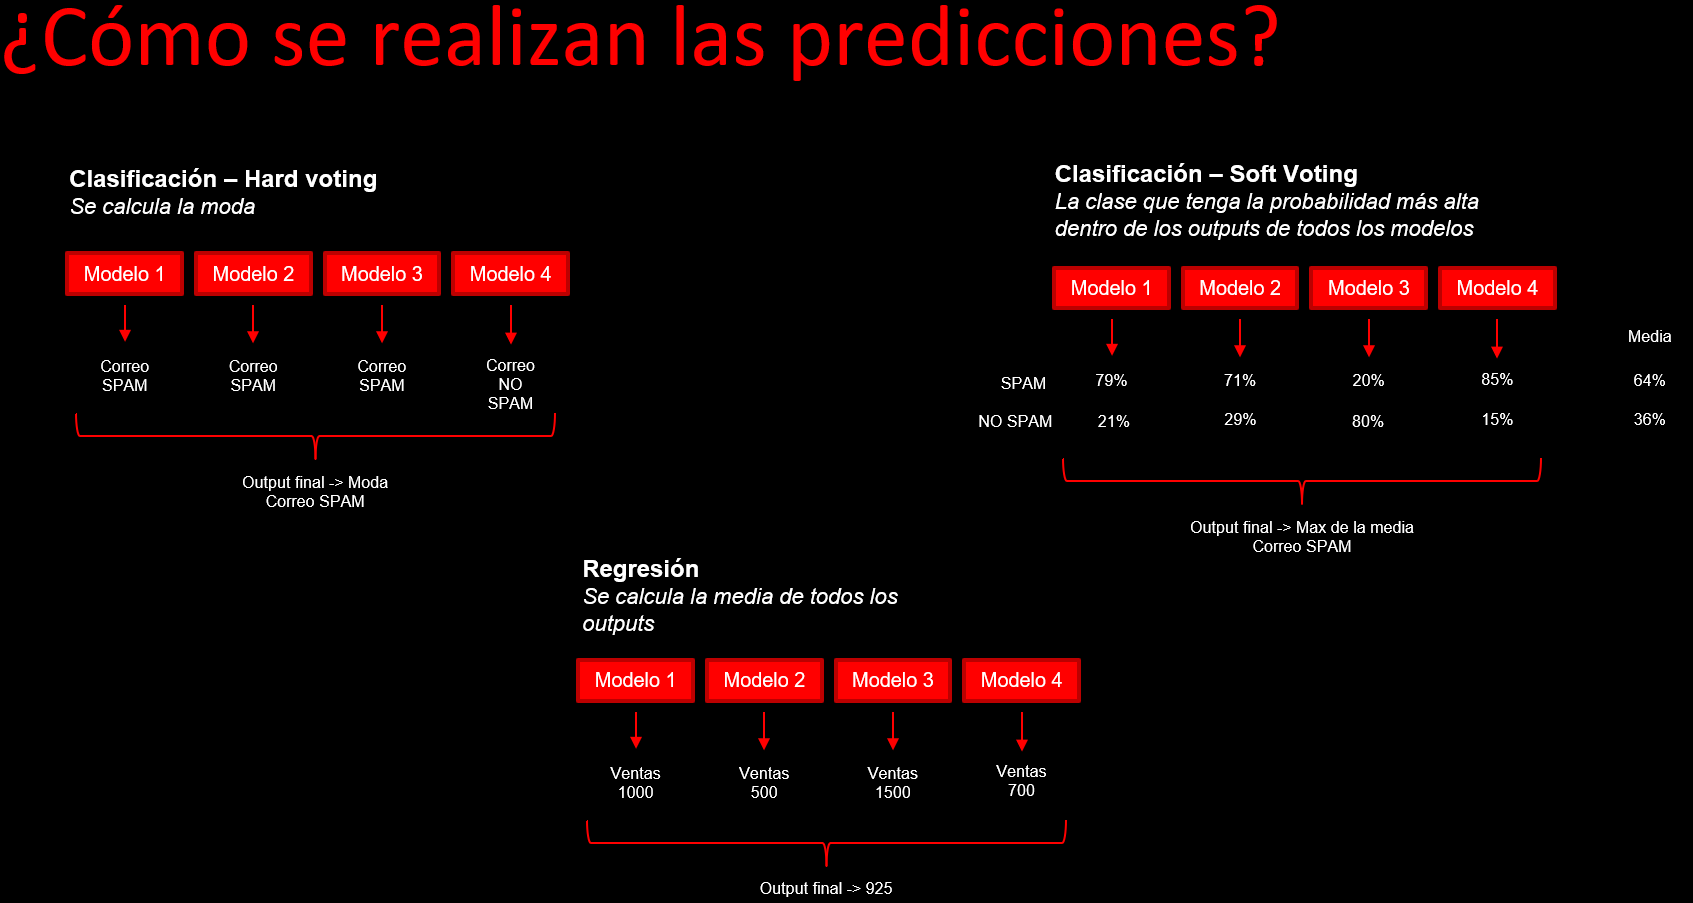

#### Modelado y entrenamiento

In [4]:
from sklearn.ensemble import RandomForestClassifier


rnd_clf = RandomForestClassifier(n_estimators=500,
                                max_depth=4,
                                random_state=42)

rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

Antes de seguir, un detalle de implementación, si no se dice nada acerca de max_samples (número de máximo de instancias por train de submodelo), entonces cada submodelo ve un subdataset con un numero de instancias igual que el dataset original, pero ojo puede contener duplicados de instancias.

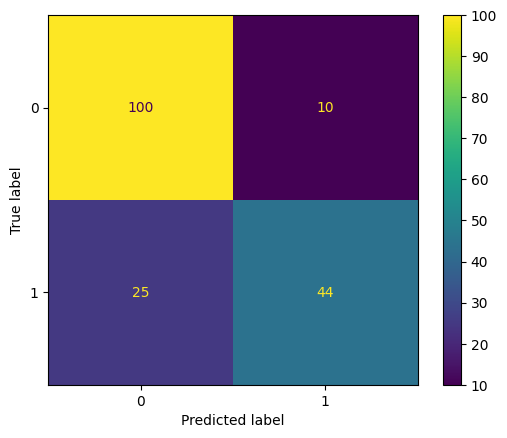

In [5]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)

In [6]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       110
           1       0.81      0.64      0.72        69

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.81      0.80      0.80       179



Para lo seleccioando no tiene nada de mala pinta, aunque una logística igual hubiera obtenido más sin tocar un solo hiperparámetro, lo veremos al final del sprint.

### **Feature Importance**

Una característica interesante que tiene Random Forest es el **feature importance**. Nos da una medida de cuánto aporta cada feature a las predicciones. Se calcula para cada feature la aportación que ha hecho al gini o entropía. Para todos los árboles. Calculamos la media de la aportación de cada feature.

En cada split de los árboles se calcula el IG (Information Gained) teniendo en cuenta el índice Gini o la entropía antes y después del split. Se realiza una ponderación del IG en cada split

Por suerte sklearn ya realiza esta operación por nosotros, y lo normaliza a 1, de tal manera que las features más importantes estarán cercanas a 1 (el sumatorio de todas no es 1, no es un %).

In [7]:
rnd_clf.feature_importances_

array([0.23586492, 0.47903926, 0.12404398, 0.07216613, 0.06090722,
       0.01242875, 0.01554973])

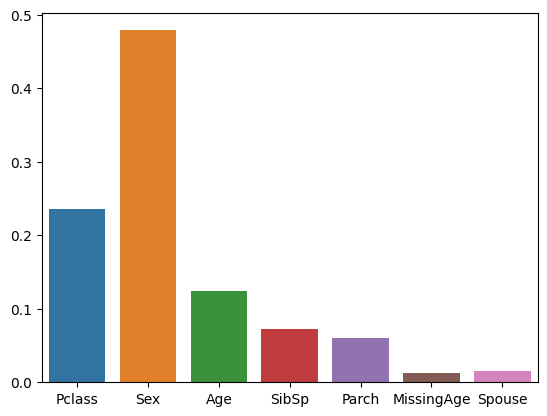

In [8]:
sns.barplot(x=classes, y=rnd_clf.feature_importances_, hue = classes);

***

### **Regresión**

Aplicamos ahora RandomForest a un problema de regresión, con un dataset que también es familiar (aunque ligeramente diferente), sí vamos a predecir precios de casas. Carguemos el dataset (de nuevo preparado para no tener que hacer nada, un lujo solo para las clases y algunos ejercicios)

In [9]:
df_reg = pd.read_csv('data/USA_Housing.csv')
X_reg = df_reg.drop(columns=['Price','Address'])
y_reg = df_reg['Price']
df_reg.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."


Hacemos nuestro split:

In [10]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg,y_reg,
                                                                   test_size=0.2,
                                                                   random_state=55)

Instanciamos y entrenamos

In [11]:
from sklearn.ensemble import RandomForestRegressor


rnd_reg = RandomForestRegressor(n_estimators=500,
                               max_depth=5,
                               random_state=42)
rnd_reg.fit(X_train_reg, 
           y_train_reg)


RandomForestRegressor(max_depth=5, n_estimators=500, random_state=42)

Evaluamos, todavía usando test, ya entraremos en el momento en que esta primera "evaluación" será más una validación y la haremos con croos_validation

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

y_pred_reg = rnd_reg.predict(X_test_reg)
print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)))

MAE: 130675.24633852691
RMSE: 164427.11046579998


Nuestro primer objetivo está cumplido, que vieras como se instancia un RandomForest para regresión (no muy diferente que para clasificación) y por eso, ahora no lo vamos a ver, pero esos valores dan un poco de susto, ¿no? Más de 100K dolares de error... Te dejo como ejercicio decidir sin preguntar a nadie si es un muy mal modelo o no lo es tanto.

### Hiperparámetros

La complejidad inherente a un esamblado de modelos, aunque sea un ensamblado de modelos del mismo tipo como son los que veremos nosotros, ya hace que sea importante gestionarlos a través de los hiperparámetros. En el caso de bagging con Random Forest vamos a tener los propios de los árboles que lo compenen y otros a nivel general del modelo ensamblado:

**¿Qué hiperparámetros debería tocar en el RandomForest?**
  
A nivel de modelo general:
1. `n_estimators`: número de árboles que participarán en las votaciones. Cuantos más mejor. NO producen overfitting. Cuanto más complejo es el dataset, mejor vendrá que haya muchos árboles. Más de 200 suele ser redundante.
2. `max_samples`: No se suele tocar, pero determina el porcentaje (si das un valor entre 0 y 1) o el número máximo de instancias que puede ver cada submodelo. Si no ponemos nada cada submodelo (como se ha comentado) ve tantos elementos en entrenamiento como elementos tenga el dataset de train, pero ojo, es con reposición (si no tocamos otro hiperparámetro :-)) y por lo tanto puede haber instancias replicadas. En general no lo vamos a tocar pero si alguna vez quieres forzar la debilidad de los submodelos puedes jugar a bajarlo progresivamente o a optimizarlo con rangos bajos y altos (es decir cercanos a 0.01 y 1.00)

A nivel de submodelo (de los árboles, observa que son genéricos, se aplica el mismo valor para cada árbol o submodelo), son iguales que en los árboles de decisión:  
  
4. `max_depth`: profundida de los árboles. Cuanto más profundos, más complejo es el modelo, pero menos generaliza. De  nuevo, cuanto más complejo es el problema, mayor profundidad necesitaremos. No más de 20/30 es lo normal.  
5. `max_features`: features a tener en cuenta en los splits del árbol. Cuanto más bajo, mejor generalizará y menos overfitting. Numero menor a la cantidad de features del dataset, sino dará error. Ojo porque por defecto está puesto a la raíz cuadrada del número total de features.  
6. `min_samples_split`: mínima cantidad de muestras en un nodo antes de ser spliteado. 2 por defecto. Números bajos suelen dar buenos resultados (<50). Cuanto más alto, mejor generaliza, pero más baja la precisión.  
7. `min_samples_leaf`: mínima cantidad de puntos permitidos en un `leaf node`, es decir, un nodo que no va a volver a ser spliteado. Valores bajos funcionan bien (<50).  

Importante FIJATE SIEMPRE en los valores por defecto de los hiperparámetros de los modelos que instancies. En el caso de los Random Forest de sklearn los árboles tienen libertad para overfittear lo que quieran si no tocas ninguno de sus hiperparámetros.


### Ajuste de hiperparámetros (ejemplo)

Para terminar vajos a ajustar los hiperparametros de los bosques que hemos creado en las celdas anteriores.

***Primero: Selección de la malla o "grid"***

Creamos el Grid o juego de hiperparámetros y rangos que queremos testar

In [13]:
param_grid_clf = { # Lo vamos a probar para el clasificador, con el regresor es equivalente pero los valores no serán los mismos (no tenemos por ejemplo el mismo nuúmero de muestras)
    "n_estimators": [100,200,400], # Tecnica del halving (doblamos o dividimos a la mitad)
    "max_depth": [2,4,8,None],
    "max_features": ["sqrt", "log2", None], # Vamos a probar diferente número de features en cada split
    "class_weight": ["balanced", None]
}

***Segundo: Selección del método o estrategia de búsqueda***

Vamos a emplear GridSearchCV porque a pesar del número de combinaciones, el tiempo de ejecución está dentro de un orden.

**Grid Search**

A pesar de lo comentado tenemos 3x4x3x2 combinaciones, es decir 72 modelos y vamos a usar una validación cruzada de 5 folds (cv = 5) o sea vamos a entrenar 360 modelos... Aquí los tiempos empiezan a ser importantes incluso para un modelo tan sencillo y con tan pocos datos (711 instancias) (un entrenamiento de 1 segundo ya nos llevaría a 6 minutos mínimo para esta optimización tan sencilla)

In [14]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

clf_rf = RandomForestClassifier()

grid_models = GridSearchCV(clf_rf,
                           param_grid_clf,
                           scoring = "balanced_accuracy", # es el recall medio considerando el recall de cada clase
                           cv = 5
                          )

grid_models.fit(X_train, y_train)
                           

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [2, 4, 8, None],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 400]},
             scoring='balanced_accuracy')

In [15]:
grid_models.best_params_

{'class_weight': 'balanced',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [16]:
grid_models.best_score_

np.float64(0.8157532218739115)

In [17]:
best_model = grid_models.best_estimator_

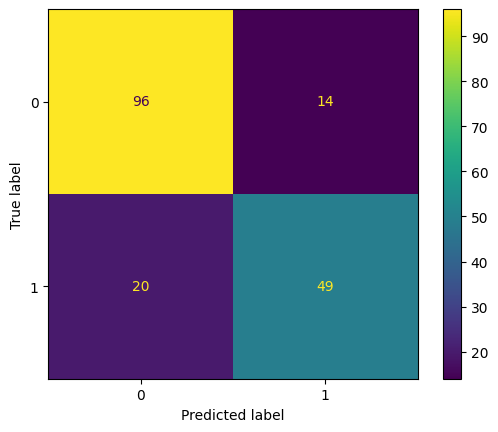

In [18]:
ConfusionMatrixDisplay.from_predictions(y_test, best_model.predict(X_test))

In [19]:
print(classification_report(y_test, best_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.71      0.74        69

    accuracy                           0.81       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



In [20]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       110
           1       0.81      0.64      0.72        69

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.81      0.80      0.80       179



In [21]:
### ANEXO: Metricas sklearn ###

from sklearn.metrics import get_scorer_names
get_scorer_names()


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'd2_absolute_error_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall